<a href="https://colab.research.google.com/github/feraskhouri/dataVisualization_project/blob/main/ShAI_BootCamp_Assignment.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


## Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [8]:
df.shape

(9854, 13)

In [13]:
df.dtypes


Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
Status              float64
dtype: object

In [18]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,9854.00000,9853.000000,9853.000000,9853.000000,0.0,9853.000000,9853.000000,9853.0,0.0,0.0
mean,4927.50000,112618.251301,10774.278504,9007.342012,NaN,132399.871817,132399.871817,2011.0,NaN,NaN
std,2844.74911,25934.343901,16958.341007,12833.801488,NaN,29090.502655,29090.502655,0.0,NaN,NaN
min,1.00000,0.000000,0.000000,0.000000,NaN,98061.210000,98061.210000,2011.0,NaN,NaN
25%,2464.25000,99014.400000,0.000000,915.590000,NaN,111273.340000,111273.340000,2011.0,NaN,NaN
50%,4927.50000,107797.610000,4078.000000,6070.630000,NaN,124674.770000,124674.770000,2011.0,NaN,NaN
75%,7390.75000,123240.000000,13453.810000,12856.090000,NaN,147004.380000,147004.380000,2011.0,NaN,NaN
max,9854.00000,294580.020000,245131.880000,400184.250000,NaN,567595.430000,567595.430000,2011.0,NaN,NaN


In [16]:
df.isnull().sum()

Id                     0
EmployeeName           0
JobTitle               1
BasePay                1
OvertimePay            1
OtherPay               1
Benefits            9854
TotalPay               1
TotalPayBenefits       1
Year                   1
Notes               9854
Agency                 1
Status              9854
dtype: int64

the Data Cleaning method i used is mean smoothing and the reason i used because its simple and effective i have made bins because the data set is big and tacking the mean for the hole data set and giving it to every null value seems very wrong

In [69]:
# Convert all columns to numeric, if possible
df = df.apply(pd.to_numeric, errors='ignore')
def mean_smoothing(data, bin_size=50):
    smoothed_data = []
    for i in range(0, len(data), bin_size):
        current_bin = data[i:i+bin_size]
        bin_mean = sum(current_bin) / len(current_bin)
        smoothed_data.extend([bin_mean] * len(current_bin))
    return smoothed_data
# Now apply the mean smoothing function
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(pd.Series(mean_smoothing(df[column].dropna())), inplace=True)


<ipython-input-69-1ff0a8cb51b7>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df[column].fillna(pd.Series(mean_smoothing(df[column].dropna())), inplace=True)


In [20]:
df.isnull().sum()

Id                     0
EmployeeName           0
JobTitle               1
BasePay                0
OvertimePay            0
OtherPay               0
Benefits            9854
TotalPay               0
TotalPayBenefits       0
Year                   0
Notes               9854
Agency                 1
Status              9854
dtype: int64

<Axes: >

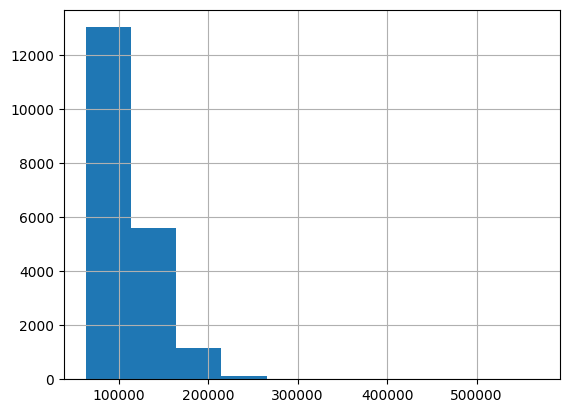

In [28]:
df['TotalPay'].hist()

i didnt find departments so used job title

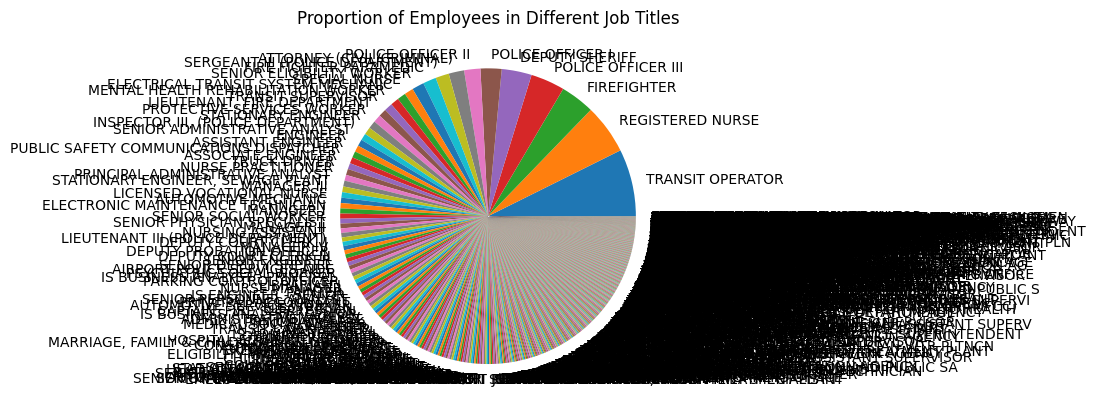

In [61]:
job_counts = df['JobTitle'].value_counts()
plt.pie(job_counts, labels = job_counts.index)
plt.title('Proportion of Employees in Different Job Titles')
plt.show()

In [29]:
print(df.groupby('JobTitle')['TotalPay'].mean())

JobTitle
ACCOUNTANT                                 65308.660000
ACUPUNCTURIST                              67594.400000
ADMINISTRATIVE ANALYST                     73172.717424
ADMINISTRATIVE ANALYST II                  75585.820000
ADMINISTRATIVE ANALYST III                 92698.515000
                                              ...      
WIRE ROPE CABLE MAINTENANCE SUPERVISOR    199628.970000
WORKER'S COMPENSATION ADJUSTER             74648.163500
WORKER'S COMPENSATION SUPERVISOR I         91020.726000
X-RAY LABORATORY AIDE                      68849.223750
ZOO CURATOR                                66686.560000
Name: TotalPay, Length: 870, dtype: float64


In [32]:
df[['TotalPay', 'BasePay']].corr()

,TotalPay,BasePay
TotalPay,1.000000,0.839597
BasePay,0.839597,1.000000


from matplotlib import pyplot as plt
_df_0['TotalPay'].plot(kind='hist', bins=20, title='TotalPay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['BasePay'].plot(kind='hist', bins=20, title='BasePay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='TotalPay', y='BasePay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BasePay']
  ys = series['TotalPay']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('BasePay', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BasePay')
_ = plt.ylabel('TotalPay')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['BasePay']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'BasePay'}, axis=1)
              .sort_values('BasePay', ascending=True))
  xs = counted['BasePay']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('BasePay', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BasePay')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['TotalPay'].plot(kind='line', figsize=(8, 4), title='TotalPay')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['BasePay'].plot(kind='line', figsize=(8, 4), title='BasePay')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0, 0.5, 'Base Pay')

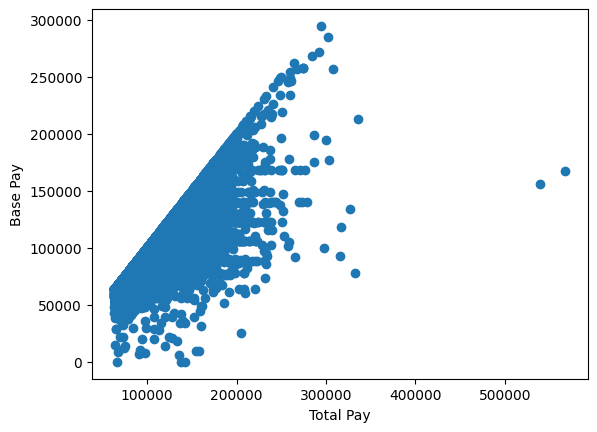

In [62]:
plt.scatter(df['TotalPay'], df['BasePay'])
plt.xlabel('Total Pay')
plt.ylabel('Base Pay')

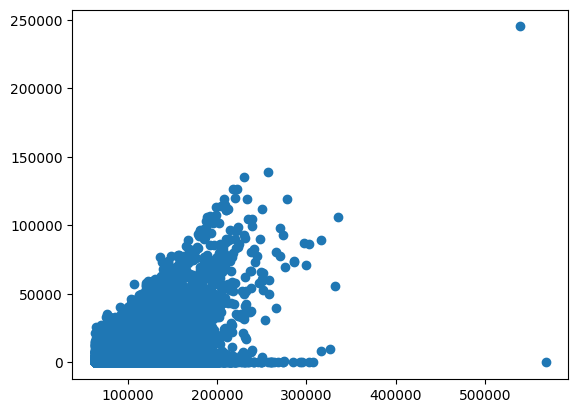

In [37]:
plt.scatter(df['TotalPay'], df['OvertimePay'])
plt.xlabel('Total Pay')
plt.ylabel('Over time Pay')

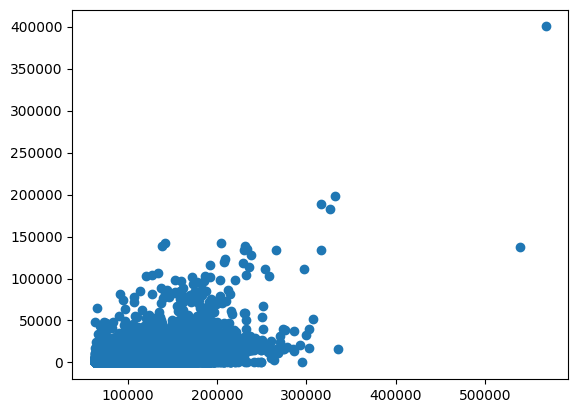

In [39]:
plt.scatter(df['TotalPay'], df['OtherPay'])
plt.xlabel('Total Pay')
plt.ylabel('Other Pay')

the insight we have a data set with 14 column (Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay,Benefits, TotalPay, TotalPayBenefits, Year, Notes, Agency and Status ) from  the  pie chart we can see that the majority of the employees are transit operator , registerd nurse ,firefighter and many other, the total pay ranges from 98061.210000 to 567595.430000 the correlation between total pay and base pay is high with about 0.84 from the scatterPlot we can see that the basePay has the most effect for total pay among basePay, overtime pay , and other pay.

> Indented block



# Good Luck!